**RANDOM IMPUTATION**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../files/train.csv", usecols=["Survived", "Age", "Fare"])

In [3]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=5)

In [7]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [ ]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

X_test["Age_imputed"][X_test["Age_imputed"].isnull()] = X_test["Age"].dropna().sample(X_test["Age"].isnull().sum()).values


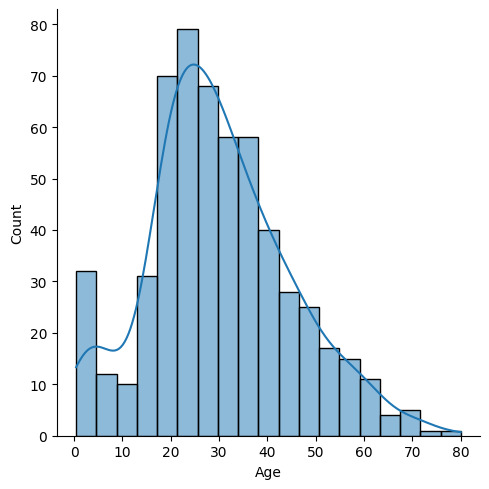

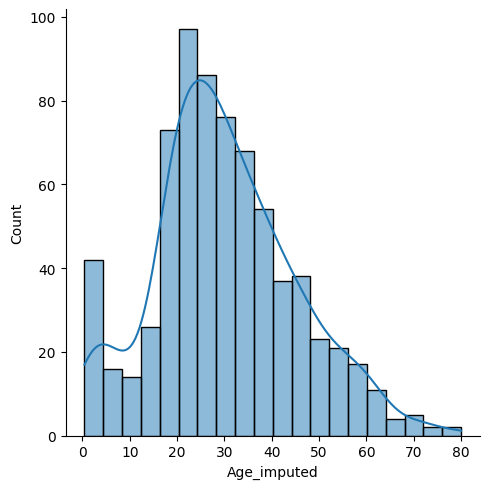

In [12]:
sns.displot(X_train['Age'], label= 'Original', kde = True)
sns.displot(X_train['Age_imputed'], label= 'Imputed', kde= True)

In [13]:
print(f"Variance in original dataset: {X_train['Age'].var()}")
print(f"Variance in imputed dataset: {X_train['Age_imputed'].var()}")

Variance in original dataset: 217.29286946463316
Variance in imputed dataset: 225.58287103067366


In [ ]:
# Sampled Value 
# sampled_value = X_train['Age'].dropna().sample(1, random_state= int(observation['Fare']))
# this code ensures same output for the same fare